# t-Distributed Stochastic Neighbor Embedding (t-SNE)

This notebook demonstrates how to apply t-Distributed Stochastic Neighbor Embedding (t-SNE) to a real-world dataset.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, seaborn, pandas, and scikit-learn.

In [1]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from matplotlib.colors import LinearSegmentedColormap
from sklearn.manifold import TSNE

from sklearn.datasets import load_breast_cancer
from sklearn.metrics.pairwise import pairwise_distances

## Define Colors and Helper Functions

Define custom colors and helper functions for visualization.

In [2]:
# Define the colors to be used in the plot.
colors = [
    "#C03B26", # Red
    "#179E86", # Dark Green
    "#44546A", # Gray
]


def render_covariance_matrix(cov_matrix: pd.DataFrame):
    """
    Render the covariance matrix as a heatmap.

    Args:
        cov_matrix (pd.DataFrame): The covariance matrix to be rendered.
    """
    plt.figure(figsize=(8, 6))
    cmap = LinearSegmentedColormap.from_list(
        "custom_green", ["#FFFFFF", "#179E86"])
    columns = df.columns
    sns.heatmap(
        cov_matrix, annot=True, fmt="f", cmap=cmap,
        xticklabels=[columns[0].title(), columns[1].title()],
        yticklabels=[columns[0].title(), columns[1].title()]
    )
    plt.title("Covariance Matrix")


def render_transformation_matrix(matrix: pd.DataFrame):
    """
    Render the transformation matrix as a heatmap.

    Args:
        matrix (pd.DataFrame): The transformation matrix to be rendered.
    """
    plt.figure(figsize=(8, 6))
    cmap = LinearSegmentedColormap.from_list(
        "custom_green", ["#FFFFFF", "#179E86"])
    sns.heatmap(
        matrix, annot=True, fmt="f", cmap=cmap,
        xticklabels=["First Eigenvector", "Second Eigenvector"],
        yticklabels=["X", "Y"]
    )
    plt.title("Transformation Matrix")


def plot_data(df: pd.DataFrame, x_label: str = "mean texture",
              y_label: str = "mean radius"):
    """
    Create a scatter plot to show the relationship between mean radius and mean
    texture, and modifying the circle size to show data overlapping.

    Args:
        df (pd.DataFrame): The DataFrame containing the data to be plotted.
        x_label (str): The label for the x-axis.
        y_label (str): The label for the y-axis.
    """
    sns.scatterplot(
        data=df, x=x_label, y=y_label,
        hue=df["target"].map({0: "Malignant", 1: "Benign"}),
        palette=colors[:2][::-1],
        s=50, edgecolor=colors[-1], alpha=0.6
    )
    plt.title(
        "Breast Cancer Dataset (10% Sample)")
    plt.xlabel(x_label.title())
    plt.ylabel(y_label.title())

    x_extra = (df[x_label].max() - df[x_label].min()) * 0.15
    y_extra = (df[y_label].max() - df[y_label].min()) * 0.15
    plt.xlim(
        df[x_label].min() - x_extra,
        df[x_label].max() + x_extra
    )
    plt.ylim(
        df[y_label].min() - y_extra,
        df[y_label].max() + y_extra
    )

    plt.grid(True)
    plt.legend(title="Diagnosis")
    plt.tight_layout()


def plot_classes(df: pd.DataFrame, x_label: str = "mean texture",
                 y_label: str = "mean radius"):
    """
    Create a scatter plot to show the distribution of the classes in the
    dataset.

    Args:
        df (pd.DataFrame): The DataFrame containing the data to be plotted.
        x_label (str): The label for the x-axis.
        y_label (str): The label for the y-axis.
    """
    _, axes = plt.subplots(1, 2)

    for i, label in enumerate([x_label, y_label]):
        sns.scatterplot(
            ax=axes[i], data=df,
            x="target", y=label,
            c=[colors[color] for color in df["target"]],
            s=50, edgecolor=colors[-1], alpha=0.6
        )
        axes[i].set_title(
            f"Distribution of {label.title()}")
        axes[i].set_xlabel("")
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(["Malignant", "Benign"])
        axes[i].set_xlim(-0.5, 1.5)
        axes[i].set_ylabel(label.title())
        axes[i].spines["top"].set_visible(False)
        axes[i].spines["right"].set_visible(False)

    plt.tight_layout()
    plt.show()

## Load and Prepare Breast Cancer Dataset

Load the Breast Cancer dataset and select a random 20% sample for analysis.

In [3]:
# Load the Breast Cancer Dataset.
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Randomly select 20% of the data using a Gaussian distribution.
np.random.seed(42)
sample_indices = np.random.choice(
    df.index, size=int(0.20 * len(df)), replace=False)
df = df.loc[sample_indices].reset_index(drop=True)

## Calculate High-Dimensional Pairwise Distances

Calculate pairwise distances to simulate high-dimensional similarities.

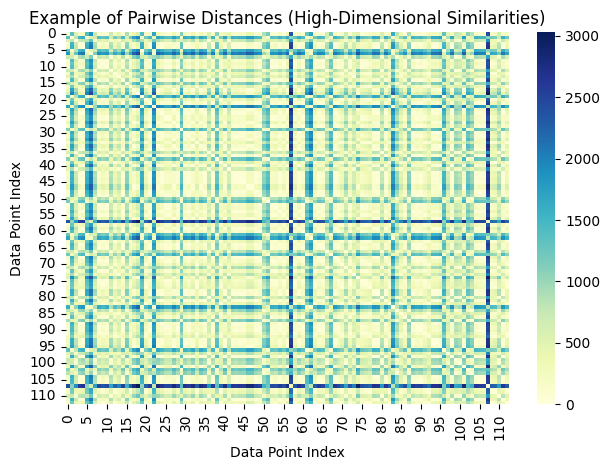

In [4]:
# Calculate pairwise distances to simulate high-dimensional similarities.
pairwise_dist = pairwise_distances(
    df.drop(columns=["target"]), metric="euclidean")

# Plotting the example of pairwise distances.
sns.heatmap(pairwise_dist, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Example of Pairwise Distances (High-Dimensional Similarities)")
plt.xlabel("Data Point Index")
plt.ylabel("Data Point Index")
plt.tight_layout()
plt.show()

## Visualize Initial Random Embedding

Show the initial random low-dimensional embedding before t-SNE optimization.

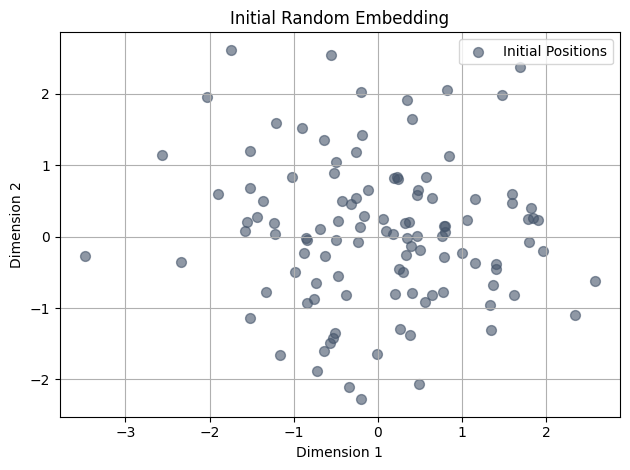

In [5]:
# Initial random low-dimensional embedding before optimization
initial_positions = np.random.randn(df.shape[0], 2)
plt.scatter(
    initial_positions[:, 0], initial_positions[:, 1],
    color=colors[-1], s=50, edgecolor=colors[-1], alpha=0.6,
    label="Initial Positions"
)
plt.title("Initial Random Embedding")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Apply t-SNE

Apply t-SNE to create a low-dimensional embedding that preserves local structure.

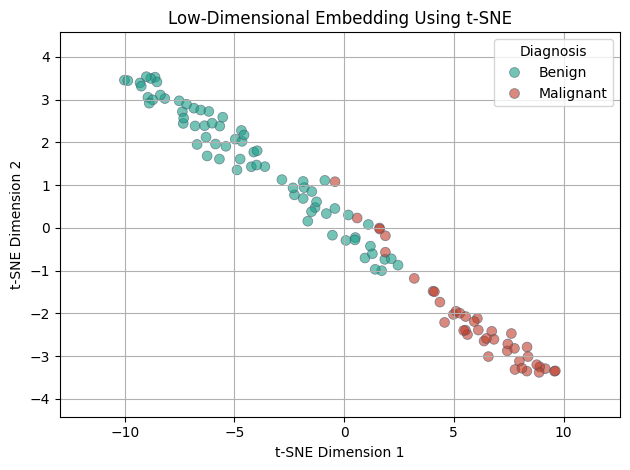

In [6]:
# Apply t-SNE to the data to create a low-dimensional embedding.
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(df.drop(columns=["target"]))

df_embedded = pd.DataFrame(
    X_embedded, columns=["t-SNE Dimension 1", "t-SNE Dimension 2"])
df_embedded["target"] = df["target"]
plot_data(df_embedded, x_label="t-SNE Dimension 1", y_label="t-SNE Dimension 2")
plt.title("Low-Dimensional Embedding Using t-SNE")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

## Calculate Low-Dimensional Pairwise Distances

Calculate pairwise distances in the low-dimensional space after t-SNE.

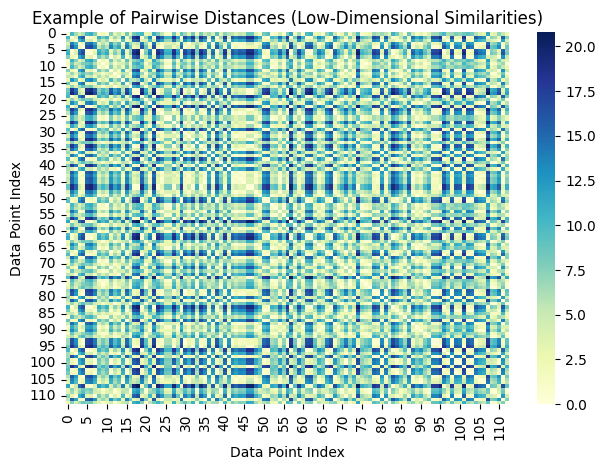

In [7]:
# Calculate pairwise distances in the low-dimensional space.
pairwise_dist_low_dim = pairwise_distances(X_embedded, metric="euclidean")

# Plotting the example of pairwise distances in the low-dimensional space.
sns.heatmap(pairwise_dist_low_dim, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Example of Pairwise Distances (Low-Dimensional Similarities)")
plt.xlabel("Data Point Index")
plt.ylabel("Data Point Index")
plt.tight_layout()
plt.show()